## 2. Análise dos Dados

**Base para Cálculo de Custos de Energia**

No nosso conteúdo geral de explicação, detalhei como iremos chegar nos valores e com base em dados reais. Nada que faremos aqui, será inventado.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
from datetime import datetime, timedelta
import random
import classebancodados


# 1. Estatísticas Descritivas

Primeiro, vamos calcular as estatísticas descritivas para entender as características dos dados, como médias, medianas, desvio padrão, valores mínimos e máximos de consumo e custo. Vamos também fazer isso por ambiente, item e turno, para ter uma visão mais detalhada.


In [2]:

# Carregar os dados
df = pd.read_csv('historico_consumo')

# Estatísticas descritivas gerais
estatisticas_gerais = df[['consumo_kwh', 'custo_estimado']].describe()

# Estatísticas descritivas por ambiente
estatisticas_ambiente = df.groupby('ambiente')[['consumo_kwh', 'custo_estimado']].describe()

# Estatísticas descritivas por item
estatisticas_item = df.groupby('item')[['consumo_kwh', 'custo_estimado']].describe()

# Estatísticas descritivas por turno
estatisticas_turno = df.groupby('turno')[['consumo_kwh', 'custo_estimado']].describe()

# Exibir as estatísticas
print("Estatísticas Gerais:")
print(estatisticas_gerais)
print("\nEstatísticas por Ambiente:")
print(estatisticas_ambiente)
print("\nEstatísticas por Item:")
print(estatisticas_item)
print("\nEstatísticas por Turno:")
print(estatisticas_turno)


Estatísticas Gerais:
       consumo_kwh  custo_estimado
count  2000.000000     2000.000000
mean      2.788945        2.158985
std       1.309790        1.061540
min       0.500000        0.320000
25%       1.650000        1.240000
50%       2.800000        2.120000
75%       3.902500        2.980000
max       4.990000        4.750000

Estatísticas por Ambiente:
           consumo_kwh                                                         \
                 count      mean       std   min     25%    50%     75%   max   
ambiente                                                                        
banheiro         286.0  2.898706  1.250848  0.52  1.8050  2.945  3.8975  4.98   
cozinha          272.0  2.793235  1.322303  0.51  1.6200  2.865  3.8525  4.97   
lavanderia       284.0  2.854296  1.321720  0.50  1.7700  2.910  4.0450  4.99   
quarto1          262.0  2.601145  1.274010  0.54  1.6325  2.370  3.6800  4.99   
quarto2          286.0  2.695385  1.369749  0.50  1.3850  2.710  3.84

# 2. Visualização de Dados

Agora, vamos visualizar os dados para verificar como o consumo e o custo estão distribuídos. Podemos criar alguns gráficos, como histogramas, boxplots e gráficos de barras para entender essas distribuições.

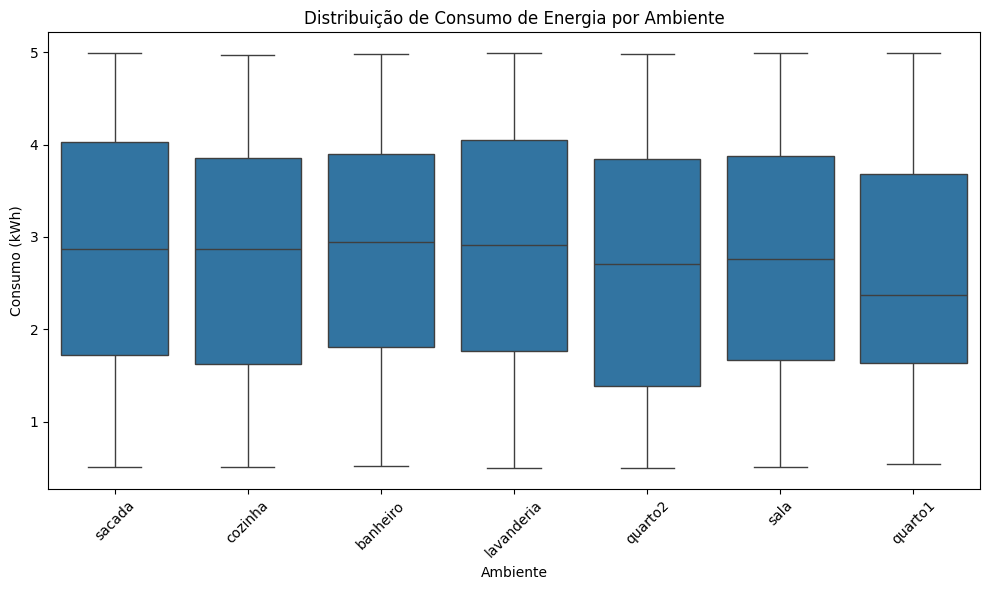

In [3]:


# Gráfico de barras de consumo por ambiente
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='ambiente', y='consumo_kwh')
plt.title('Distribuição de Consumo de Energia por Ambiente')
plt.xlabel('Ambiente')
plt.ylabel('Consumo (kWh)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


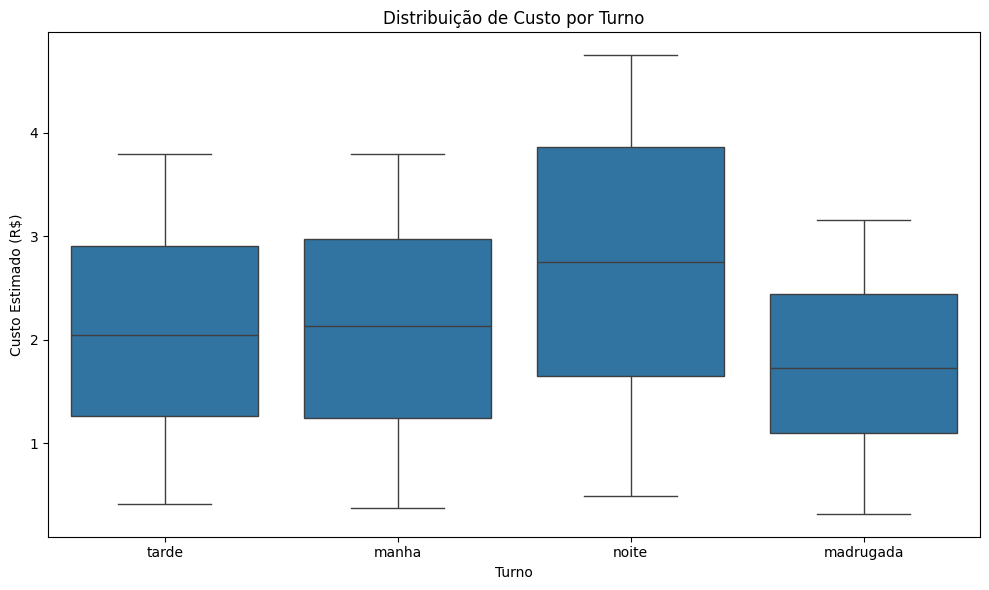

In [4]:
# Gráfico de barras de custo por turno
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='turno', y='custo_estimado')
plt.title('Distribuição de Custo por Turno')
plt.xlabel('Turno')
plt.ylabel('Custo Estimado (R$)')
plt.tight_layout()
plt.show()


***************

# Fase 2: Modelagem de Previsão de Custo

Nesta fase, vamos usar a análise de regressão para tentar prever o custo com base em variáveis como consumo_kwh, ambiente, item, e turno. Para isso, usaremos o modelo de Regressão Linear.

In [5]:

# One-Hot Encoding das variáveis categóricas
df_encoded = pd.get_dummies(df, columns=['ambiente', 'item', 'turno'], drop_first=True)

# Definir variáveis independentes (X) e variável dependente (y)
X = df_encoded.drop(['data', 'custo_estimado'], axis=1)
y = df_encoded['custo_estimado']

# Dividir os dados em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar o modelo de regressão linear
modelo = LinearRegression()

# Treinar o modelo
modelo.fit(X_train, y_train)

# Fazer previsões com o conjunto de teste
y_pred = modelo.predict(X_test)

# Avaliar o modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Erro Médio Absoluto (MAE): {mae:.2f}')
print(f'Erro Quadrático Médio (MSE): {mse:.2f}')
print(f'R²: {r2:.2f}')


Erro Médio Absoluto (MAE): 0.07
Erro Quadrático Médio (MSE): 0.01
R²: 0.99


Os resultados indicam que o modelo de regressão linear está performando muito bem!

Erro Médio Absoluto (MAE): 0.07 — O erro médio da previsão é muito baixo, o que indica que as previsões estão bem próximas dos valores reais.

Erro Quadrático Médio (MSE): 0.01 — Isso também demonstra que o modelo está com um erro muito pequeno nas previsões.

R²: 0.99 — Um valor de R² tão alto (quase 1) significa que o modelo explica quase 99% da variabilidade dos dados, o que é excelente!

Isso sugere que o modelo de Regressão Linear está capturando bem a relação entre o consumo e o custo estimado.

****************************

# Fase 3: Implantação e Validação do Modelo

**Gerar base com 500 linhas para testar**

In [6]:

# Definindo os ambientes e itens
ambientes = ['sala', 'cozinha', 'quarto', 'banheiro']
itens = {
    'sala': ['televisão', 'ventilador', 'ar condicionado'],
    'cozinha': ['geladeira', 'microondas', 'fogão'],
    'quarto': ['abajur', 'ventilador', 'ar condicionado'],
    'banheiro': ['chuveiro', 'secador de cabelo']
}

# Função para gerar o consumo diário de energia (em kWh)
def gerar_consumo_diario():
    return round(random.uniform(1, 5), 2)  # consumo entre 1 e 5 kWh por dia

# Função para calcular o custo com base no consumo e turno
def calcular_custo(consumo_kwh, turno):
    tarifa = 0.60  # R$ por kWh
    if turno == 'noite':
        tarifa *= 0.9  # desconto de 10% no turno da noite
    return round(consumo_kwh * tarifa, 2)

amostras_500 = []
data_inicio = datetime(2023, 1, 1)

for i in range(500):
    data_consumo = data_inicio + timedelta(days=i)
    ambiente = random.choice(ambientes)
    item = random.choice(itens[ambiente])
    turno = random.choice(['manhã', 'tarde', 'noite'])  
    consumo_diario = gerar_consumo_diario()
    custo = calcular_custo(consumo_diario, turno) 
    
    amostras_500.append({
        'data': data_consumo.strftime('%Y-%m-%d'),
        'ambiente': ambiente,
        'item': item,
        'consumo_kwh': consumo_diario,
        'custo_estimado': custo,
        'turno': turno
    })

df_500 = pd.DataFrame(amostras_500)

print(df_500.head(10))

# Salvar os dados para teste (caso necessário)
# df_500.to_csv('historico_consumo_teste.csv', index=False)


         data  ambiente               item  consumo_kwh  custo_estimado  turno
0  2023-01-01  banheiro  secador de cabelo         4.16            2.50  tarde
1  2023-01-02      sala          televisão         3.31            1.99  tarde
2  2023-01-03  banheiro           chuveiro         3.86            2.32  manhã
3  2023-01-04    quarto             abajur         4.92            2.95  manhã
4  2023-01-05      sala          televisão         3.72            2.23  tarde
5  2023-01-06      sala         ventilador         3.65            1.97  noite
6  2023-01-07    quarto         ventilador         4.95            2.97  tarde
7  2023-01-08      sala          televisão         1.97            1.18  manhã
8  2023-01-09    quarto    ar condicionado         3.83            2.07  noite
9  2023-01-10  banheiro           chuveiro         2.93            1.76  tarde


# Testar

In [7]:
# Suponha que você tenha os dados de consumo do cliente:
consumo_cliente = 150  # consumo_kwh
turno_cliente = 'manha'  # turno
item_cliente = 'geladeira'  # item

# Criar o DataFrame para a previsão
dados_cliente = pd.DataFrame({
    'consumo_kwh': [consumo_cliente],
    'turno': [turno_cliente],
    'item': [item_cliente]
})

# Realizar o One-Hot Encoding
dados_cliente_encoded = pd.get_dummies(dados_cliente, columns=['turno', 'item'], drop_first=True)

# Garantir que as colunas estejam alinhadas com o modelo
for coluna in modelo.feature_names_in_:
    if coluna not in dados_cliente_encoded.columns:
        dados_cliente_encoded[coluna] = 0

dados_cliente_encoded = dados_cliente_encoded[modelo.feature_names_in_]

# Fazer a previsão
valor_conta_estimado = modelo.predict(dados_cliente_encoded)

# Mostrar o valor da conta estimado
print(f"Valor estimado da conta: R$ {valor_conta_estimado[0]:.2f}")


Valor estimado da conta: R$ 116.02


# Aplicar meu modelo e criar a sugestão

**Inserir este projeto na tela feita com dotnet**

In [9]:

banco_dados = classebancodados.OperacaoBancoDados(nome_tabela='T_Consumo', nome_conexao='ConexaoOracle')

conexao = banco_dados.conectar()

if conexao:
    consulta_consumo = "SELECT * FROM T_CONSUMO"
    df_consumo = banco_dados.executar_consulta(consulta_consumo)

    if df_consumo is not None:
        #print(df_consumo.head())
    else:
        print("Falha ao recuperar os dados.")

    # Fechando a conexão
    banco_dados.fechar_conexao()
else:
    print("Erro ao conectar ao banco de dados.")


Conexão com o banco de dados Oracle estabelecida com sucesso.
   ID_CONSUMO  ID_USUARIO  ID_COMODO  ID_ITEM_CASA  CONSUMO DATA_CONSUMO
0           1           1          1             5      1.0   2024-11-01
1           2           2          2             3      2.0   2024-11-02
2           3           3          3             4      3.0   2024-11-03
3           4           4          4             2      4.0   2024-11-04
4           5           5          5             7      5.0   2024-11-05
Conexão com o banco de dados fechada.


/Users/claudiobispo/Documents/global-solutions-fiap-3-sem/Disruptive_Architectures_IOT_And_IOB/classebancodados.py:31: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(consulta, self.conexao)


In [10]:
df_consumo

,ID_CONSUMO,ID_USUARIO,ID_COMODO,ID_ITEM_CASA,CONSUMO,DATA_CONSUMO
0,1,1,1,5,1.0,2024-11-01
1,2,2,2,3,2.0,2024-11-02
2,3,3,3,4,3.0,2024-11-03
3,4,4,4,2,4.0,2024-11-04
4,5,5,5,7,5.0,2024-11-05
5,6,6,6,1,6.0,2024-11-06
6,7,7,7,3,7.0,2024-11-07
7,8,8,8,6,8.0,2024-11-08
8,9,9,9,2,9.0,2024-11-09
9,10,10,10,4,10.0,2024-11-10


In [11]:

dados_encoded = pd.get_dummies(df_consumo, columns=['id_item_casa', 'id_comodo'], drop_first=True)

# Garantir que as colunas de entrada estão alinhadas com as do modelo
for coluna in modelo.feature_names_in_:
    if coluna not in dados_encoded.columns:
        dados_encoded[coluna] = 0

# Alinhar as colunas na mesma ordem do modelo
dados_encoded = dados_encoded[modelo.feature_names_in_]

# Fazer a previsão com o modelo treinado
valor_previsto = modelo.predict(dados_encoded)

# Agora você pode armazenar essas previsões na tabela de recomendações


KeyError: "None of [Index(['id_item_casa', 'id_comodo'], dtype='object')] are in the [columns]"